In [1]:
import pandas as pd

#### DDA 선택 기준
- 분석 제공 대상 선정 : 컬럼 선택 기준 달라짐.
    - 환자
    - 의사
    - 병원 운영 관리자.
    - 보호자

In [2]:
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS.head(2)

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0


In [3]:
df_ROS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1894 non-null   int64  
 1   환자ID                    1894 non-null   object 
 2   Large Lymphocyte        1894 non-null   float64
 3   Location of herniation  1894 non-null   int64  
 4   ODI                     462 non-null    float64
 5   가족력                     1843 non-null   float64
 6   간질성폐질환                  1894 non-null   int64  
 7   고혈압여부                   1894 non-null   int64  
 8   과거수술횟수                  1894 non-null   int64  
 9   당뇨여부                    1894 non-null   int64  
 10  말초동맥질환여부                1894 non-null   int64  
 11  빈혈여부                    1894 non-null   int64  
 12  성별                      1894 non-null   int64  
 13  스테로이드치료                 1894 non-null   int64  
 14  신부전여부                   1894 non-null   

### 데이터 핸들링
- 정렬 : df.sort_values(by=[], ascending=[])
- 추출 
    - 열 단위 추출 : df[['', '']], 컬럼 리스트로 한다.
    - 행 단위 추출 : iloc[:3] : 0번째 행 ~ 2행 까지
- 필터 : df.loc[conditions]
- 요약 : pivot_table(index=, values=, aggfunc=)
    - index : group by
    - values : 대상 컬럼명
    - aggfunc : 집합 함수(from numpy)

### 환자 대상 분석 필요
0. 변수 구조 확인
1. 목표 변수 설정 : '재발여부' 정의
2. 설명 변수 설정 : '성별','신장', '심혈관질환','체중','흡연여부', '연령', '직업', '혈액형 정의

In [4]:
df_ROS.columns

Index(['Unnamed: 0', '환자ID', 'Large Lymphocyte', 'Location of herniation',
       'ODI', '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부',
       '성별', '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '입원일자', '종양진행여부', '직업', '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도',
       '흡연여부', '통증기간(월)', '수술기법', '수술시간', '수술실패여부', '수술일자', '재발여부', '혈액형',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증'],
      dtype='object')

In [5]:
# '성별','신장', '심혈관질환','체중','흡연여부', '연령', '직업', '혈액형', '재발여부'
# 열 단위 추출
# df_ROS[['성별','신장', '심혈관질환','체중','흡연여부', '연령', '직업', '혈액형', '재발여부']]
df_ROS_forpatient = df_ROS[['성별','신장', '심혈관질환','체중','흡연여부', '연령', '직업', '혈액형', '재발여부']]
# df_ROS_forpatient.head(2)
df_ROS_forpatient.tail(3)

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
1891,1,167,0,70.0,0,61,무직,RH+O,0
1892,1,177,0,77.0,0,29,사무직,RH+A,0
1893,2,168,0,49.0,0,30,사무직,RH+AB,0


In [6]:
# 행단위 추출 
# iloc[:, :], head(), tail()
df_ROS_forpatient.iloc[:3]  # [:3] : 0번째 행 ~ 2행 까지

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
0,2,163,0,60.3,0,66,자영업,RH+A,0
1,1,171,0,71.7,0,47,운동선수,RH+A,0
2,1,178,0,77.1,0,39,특수전문직,RH+B,0


In [7]:
df_ROS_forpatient.iloc[-4:]

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
1890,2,157,0,59.0,0,42,사무직,RH+B,0
1891,1,167,0,70.0,0,61,무직,RH+O,0
1892,1,177,0,77.0,0,29,사무직,RH+A,0
1893,2,168,0,49.0,0,30,사무직,RH+AB,0


### index 관련 사항

In [8]:
df_ROS.set_index('환자ID') # unique column

,Unnamed: 0,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
환자ID,,,,,,,,,,,,,,,,,,,,,
1PT,0,22.8,3,51.0,0.0,0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.50,4,Down,0
2PT,1,44.9,4,26.0,0.0,0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.10,4,Up,0
3PT,2,53.0,3,NaN,0.0,0,0,1,0,0,...,0,67.5,27.3,10.2,0,-1.77,1749.00,4,Down,0
4PT,3,54.7,4,18.0,0.0,0,1,0,0,0,...,0,49.2,18.7,19.9,0,-1.58,1796.20,4,Down,0
5PT,4,53.8,4,NaN,0.0,0,1,0,0,0,...,0,58.8,14.7,5.2,0,-0.79,2021.48,4,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890PT,1889,44.0,1,NaN,0.0,0,0,0,0,0,...,2,59.5,23.0,21.8,0,NaN,2652.20,5,Middle,0
1891PT,1890,30.8,2,NaN,0.0,0,0,0,0,0,...,0,47.7,20.2,5.0,0,NaN,1795.80,4,Down,0
1892PT,1891,36.7,3,NaN,0.0,0,0,0,0,1,...,0,44.6,15.0,17.4,1,NaN,2624.40,4,Down,0


In [9]:
df_ROS = df_ROS.set_index('성별') # not unique column

In [10]:
df_ROS.iloc[-4:]

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
성별,,,,,,,,,,,,,,,,,,,,,
2,1890,1891PT,30.8,2,NaN,0.0,0,0,0,0,...,0,47.7,20.2,5.0,0,NaN,1795.8,4,Down,0
1,1891,1892PT,36.7,3,NaN,0.0,0,0,0,0,...,0,44.6,15.0,17.4,1,NaN,2624.4,4,Down,0
1,1892,1893PT,32.5,2,NaN,0.0,0,0,0,0,...,2,32.2,11.1,17.7,0,NaN,1972.5,5,Down,0
2,1893,1894PT,49.5,2,NaN,0.0,0,0,0,0,...,0,38.9,6.8,27.8,0,NaN,1574.4,5,Middle,0


In [11]:
### 정렬
df_ROS_forpatient.sort_values(by=['신장'])

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
1763,2,140,1,35.0,0,86,무직,RH+O,0
896,2,140,0,35.0,0,48,NaN,RH+A,0
348,2,142,0,52.9,0,38,자영업,RH+A,0
70,2,143,0,53.3,0,31,사무직,RH+O,0
974,2,143,0,56.0,0,56,무직,RH+O,0
...,...,...,...,...,...,...,...,...,...
202,1,189,0,85.3,0,22,군인,RH+B,0
464,1,189,0,85.9,0,39,자영업,RH+A,0
1227,1,190,0,74.0,0,47,자영업,RH+O,0
1246,1,191,0,114.0,0,17,학생,RH+O,0


In [12]:
df_ROS_forpatient.sort_values(by=['신장', '체중'], ascending=[False, False])

,성별,신장,심혈관질환,체중,흡연여부,연령,직업,혈액형,재발여부
1579,1,204,0,103.0,0,39,교사,RH+O,1
1246,1,191,0,114.0,0,17,학생,RH+O,0
1227,1,190,0,74.0,0,47,자영업,RH+O,0
464,1,189,0,85.9,0,39,자영업,RH+A,0
202,1,189,0,85.3,0,22,군인,RH+B,0
...,...,...,...,...,...,...,...,...,...
974,2,143,0,56.0,0,56,무직,RH+O,0
70,2,143,0,53.3,0,31,사무직,RH+O,0
348,2,142,0,52.9,0,38,자영업,RH+A,0
896,2,140,0,35.0,0,48,NaN,RH+A,0


## quest 1
- 정렬 : 혈액형(ascending), 직업(descending)
- 추출 : 혈액형, 직업, 성별 --> 표시

## quest 2
- 직업군이 상위 2위에 속하는 항목 : value_count, DataFrame, iloc
- 체중 > 50, 신장 > 180, 흡연여부 없는 분
- 해당 레코드 갯수 표현

# Quest 3
- quest2 집합 구성하기 
- 직업별 성별 빈도
- 직업별 혈액형 빈도

In [13]:
list(df_ROS_forpatient['직업'].value_counts().iloc[:2].index)

['사무직', '자영업']

In [14]:
df_ROS_forpatient['직업'].value_counts().index[0]

'사무직'

In [15]:
df_ROS_forpatient['직업'].value_counts().index[1]

'자영업'

In [16]:
df_ROS_forpatient['직업'].value_counts().iloc[:2].values

array([449, 171], dtype=int64)

In [17]:
df_ROS_forpatient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      1894 non-null   int64  
 1   신장      1894 non-null   int64  
 2   심혈관질환   1894 non-null   int64  
 3   체중      1894 non-null   float64
 4   흡연여부    1894 non-null   int64  
 5   연령      1894 non-null   int64  
 6   직업      1479 non-null   object 
 7   혈액형     1894 non-null   object 
 8   재발여부    1894 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 133.3+ KB


In [53]:
df_ROS_forpatient.describe()[:2] # 연속형

,신장,체중,연령
count,1894.000000,1894.00000,1894.000000
mean,168.027983,68.11114,41.463569


In [19]:
df_ROS_forpatient.describe(include=object)[:2] # 범주형

,직업,혈액형
count,1479,1894
unique,17,4


In [24]:
df_ROS_forpatient.dtypes

성별         int64
신장         int64
심혈관질환      int64
체중       float64
흡연여부       int64
연령         int64
직업        object
혈액형       object
재발여부       int64
dtype: object

#### 데이터 타입 변환
- int, float -> str(object)
- object -> int or float(소수점 있을 경우)

In [31]:
df_ROS_forpatient['흡연여부'] = df_ROS_forpatient['흡연여부'].astype(str)

In [33]:
df_ROS_forpatient['재발여부'] = df_ROS_forpatient['재발여부'].astype(str)

In [49]:
df_ROS_forpatient['성별'] = df_ROS_forpatient['성별'].astype(str)
df_ROS_forpatient['심혈관질환'] = df_ROS_forpatient['심혈관질환'].astype(str)

In [50]:
df_ROS_forpatient.dtypes

성별        object
신장         int64
심혈관질환     object
체중       float64
흡연여부      object
연령         int64
직업        object
혈액형       object
재발여부      object
dtype: object

In [51]:
continuos_list = df_ROS_forpatient.describe().columns.to_list()

In [45]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns

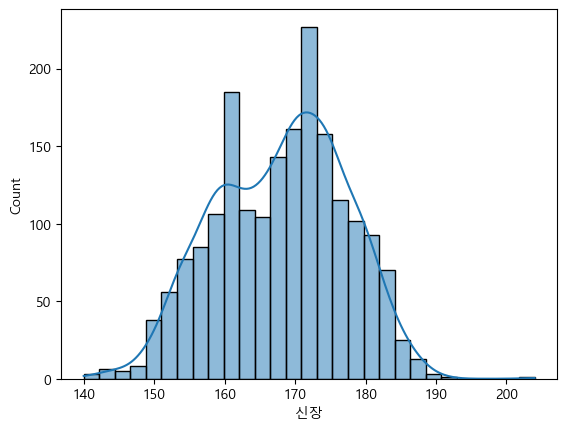

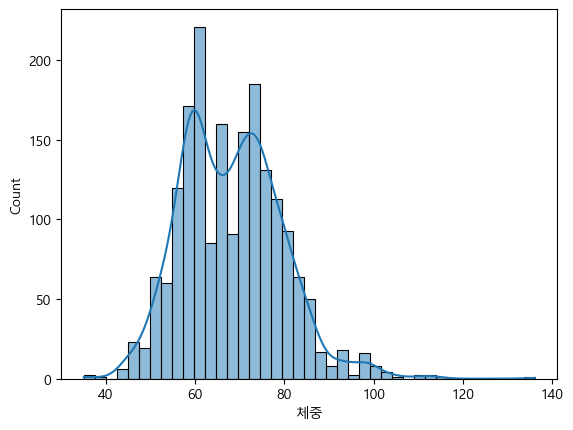

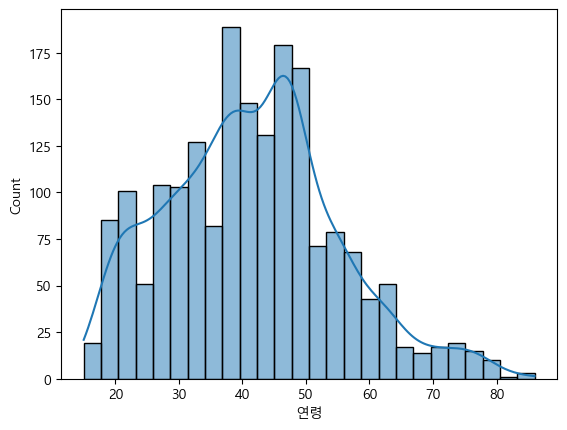

In [52]:
for continuos in continuos_list :
    sns.histplot(data=df_ROS_forpatient, x=continuos, kde=True)
    plt.show()